In [86]:
import sys
sys.path.append("..") # fix for relative imports

In [87]:
import os

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from joblib import load

from models.knn_popular import KNNpopularity 

In [2]:
DATA_PATH = '../data/movielens/1m/clean/'

In [3]:
ratings = pd.read_csv(os.path.join(DATA_PATH, 'ratings.csv'))
movies = pd.read_csv(os.path.join(DATA_PATH, 'movies.csv'))

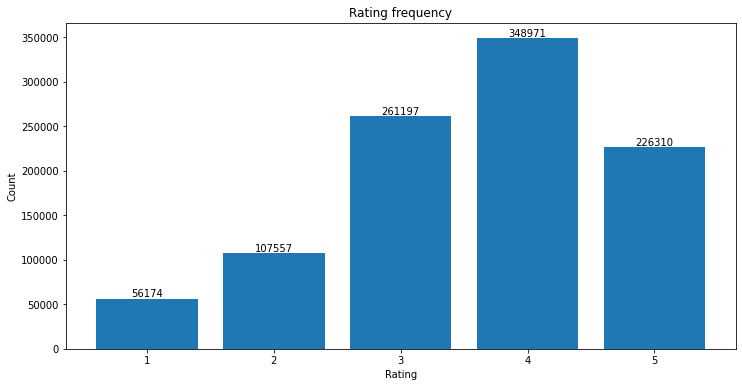

In [51]:
fig, ax = plt.subplots(figsize=(12, 6))
rating_freq = ratings['rating'].value_counts()
rect = ax.bar(rating_freq.index, rating_freq)
ax.set_ylabel('Count')
ax.set_xlabel('Rating')
ax.set_title('Rating frequency')
ax.bar_label(rect, fmt='%d');

In [5]:
user_ratings_amount = ratings['userId'].value_counts()

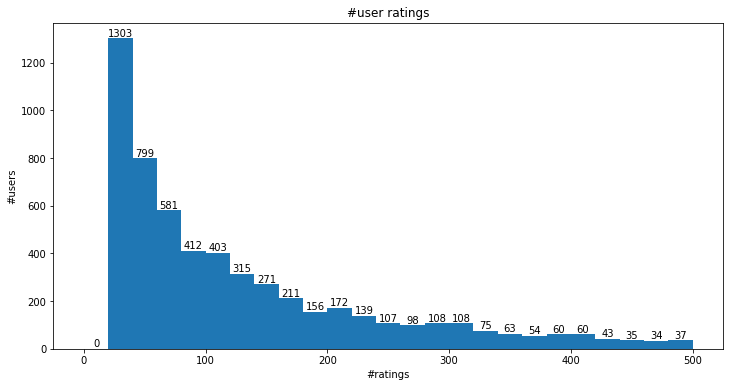

In [56]:
fig, ax = plt.subplots(figsize=(12, 6))
_, _, patches = ax.hist(user_ratings_amount, bins=25, range=(0, 500))
ax.set_ylabel('#users')
ax.set_xlabel('#ratings')
ax.set_title('#user ratings')
ax.bar_label(patches, fmt='%d');

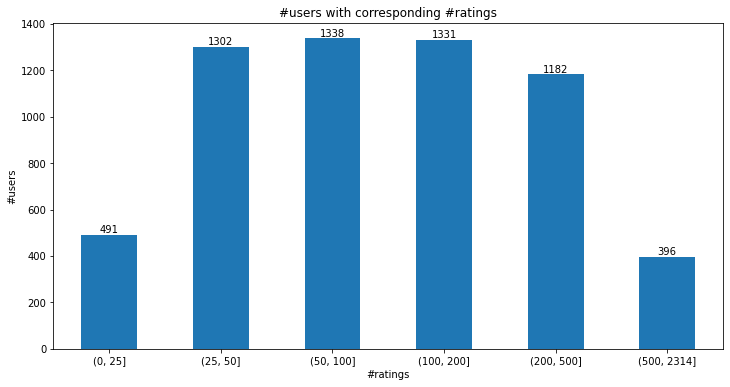

In [68]:
fig, ax = plt.subplots(figsize=(12, 6))
max_user_ratings = np.max(user_ratings_amount)
user_ratings_binned = pd.cut(user_ratings_amount, bins=[0, 25, 50, 100, 200, 500, max_user_ratings], ordered=True)
user_ratings_binned.value_counts().sort_index().plot.bar(rot=0, ax=ax)
ax.set_xlabel('#ratings')
ax.set_ylabel('#users')
ax.set_title('#users with corresponding #ratings')
ax.bar_label(ax.containers[0], fmt='%d');

c:\users\daniil\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


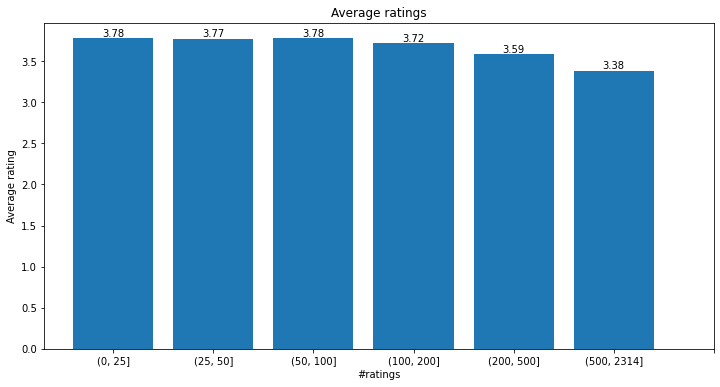

In [62]:
fig, ax = plt.subplots(figsize=(12, 6))
average_rating_per_bin = user_ratings_binned.reset_index().rename(columns={'index': 'userId', 'userId': 'bin'}).merge(ratings[['userId', 'rating']]).groupby('bin', as_index=False).mean()

rect = ax.bar(range(len(average_rating_per_bin)), average_rating_per_bin['rating'])
ax.set_xticklabels(np.unique(user_ratings_binned))
ax.set_xticks(range(len(bins)))
ax.set_xlabel('#ratings')
ax.set_ylabel('Average rating')
ax.set_title('Average ratings')
ax.bar_label(rect, fmt='%.2f');

In [85]:
movies[movies['movieId'].isin(ratings['movieId'].value_counts()[:10].index)]

,movieId,title,date,feature1,feature2,feature3,feature4,feature5,feature6,feature7,...,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18
257,260,Star Wars: Episode IV - A New Hope,220924800.0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
476,480,Jurassic Park,725846400.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
585,589,Terminator 2: Judgment Day,662688000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
589,593,"Silence of the Lambs, The",662688000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1178,1196,Star Wars: Episode V - The Empire Strikes Back,315532800.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1192,1210,Star Wars: Episode VI - Return of the Jedi,410227200.0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
1250,1270,Back to the Future,473385600.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1959,2028,Saving Private Ryan,883612800.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2502,2571,"Matrix, The",915148800.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2789,2858,American Beauty,915148800.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
